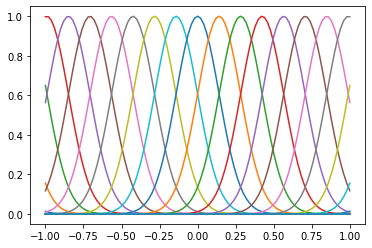

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_tut1_q3(xx, kk, hh):
    """Evaluate RBF kk with bandwidth hh on points xx (shape N,)"""
    c = ((kk - 51) * hh) / np.sqrt(2) 
    return np.exp(-(xx - c) ** 2 / hh ** 2)  # shape (N,)
# plotting code
xx = np.linspace(-1, 1, 101)
hh = 0.2
for kk in range(1,102):
    plt.plot(xx, rbf_tut1_q3(xx, kk, hh))    
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# def NormalDistribution(mean,std):
#     N = int(1e6) # 1e6 is a float, numpy wants int arguments
#     data = (np.random.randn(N)* std + mean)
#     return data

def x_gen(m,sigma,alpha,n):
    N = int(1e6)
    x1 = np.random.normal(m,sigma,N)
    v = np.random.normal(0,n,N)
    x2 = alpha * x1 + v
    return [x1,x2]

# Random pick a set of m,sigma,alpha and n
def randomPick(m,sigma,alpha,n):
    xx = x_gen(m,sigma,alpha,n)
    # The Observed mean and variance
    E_x1 = np.mean(xx[0])
    E_x2 = np.mean(xx[1])
    mu_Obs = [E_x1,E_x2]
    Cov_x1_x1 = np.var(xx[0])
    Cov_x2_x2 = np.var(xx[1])
    Sigma_Obs = np.cov(np.stack((xx[0], xx[1]), axis=0))

    # The therorical mean and variance
    mu_Prd = [m, alpha*m]
    Sigma_Prd = [[sigma**2, alpha * sigma**2],
                 [alpha * sigma**2,alpha**2 * sigma**2 + n**2]]

    print('Observed mean = ', mu_Obs)
    print('Theoretical mean = ', mu_Prd)
    print('Observed variance = ', Sigma_Obs)
    print('Theoretical variance = ', Sigma_Prd)

randomPick(5.0,6.0,7.0,8.0)


Observed mean =  [4.998434041020363, 34.98659869995204]
Theoretical mean =  [5.0, 35.0]
Observed variance =  [[  35.98173133  251.92846744]
 [ 251.92846744 1827.91566029]]
Theoretical variance =  [[36.0, 252.0], [252.0, 1828.0]]


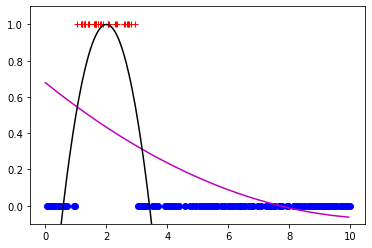

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Train model on synthetic dataset
N = 200
X = np.random.rand(N, 1)*10
yy = (X > 1) & (X < 3)
def phi_fn(X):
    return np.concatenate([np.ones((X.shape[0],1)), X, X**2], axis=1)
ww = np.linalg.lstsq(phi_fn(X), yy, rcond=None)[0]

# Predictions
x_grid = np.arange(0, 10, 0.05)[:,None]
f_grid = np.dot(phi_fn(x_grid), ww)

# Predictions with alternative weights:
w2 = [-1, 2, -0.5] # Values set by hand
f2_grid = np.dot(phi_fn(x_grid), w2)

# Show demo
plt.clf()
plt.plot(X[yy==1], yy[yy==1], 'r+')
plt.plot(X[yy==0], yy[yy==0], 'bo')
plt.plot(x_grid, f_grid, 'm-')
plt.plot(x_grid, f2_grid, 'k-')
plt.ylim([-0.1, 1.1])
plt.show()


In [6]:
#Tutorial 3

import numpy as np
import matplotlib.pyplot as plt

def gaussian(X,C):
    k = X.shape[1]
    return np.exp(-0.5*  (((X - mu) @ np.linalg.inv(C)) * (X - mu)).sum() ) / np.sqrt( (2 * np.pi)**k * np.linalg.det(C) )
    
#conditional density
mean_1 = np.mean(x1)
mean_2 = np.mean(x2)
var_1 = np.cov(x1
var_2 = np.cov(x2)
# class prior
prior_1 = len(x1)/(len(x1)+len(x2))
prior_2 = 1.0 - prior_1
# class post
post_1 = 
#multivariate class-conditional density function
prob1 = multivariate_normal(mean_1,var_1,allow_singular=True)
prob2 = multivariate_normal(mean_2,var_2,allow_singular=True)

if self.prob_1.pdf(x) * self.prior_1 > self.prob_2.pdf(x) * self.prior_2:
    print(x,' belongs to ',x1,' class.')
else:
    print(x,' belongs to ',x1,' class.')
        
x1 = [0.5, 0.1, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.35, 0.25]
x2 = [0.9, 0.8, 0.75, 1.0]
x_test = 0.6
gaussian_classifier(x_test,x1,x2)



AttributeError: module 'numpy' has no attribute 'multivariate_normal'

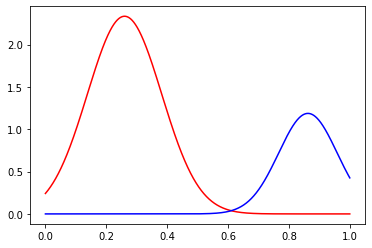

P( y= 1 | x = 0.6 ) =  0.6304909005914253


In [79]:
import numpy as np
import matplotlib.pyplot as plt
class GaussianClassifier():

    def cal_gaussian(self, X, C, mu):
        exponent = np.exp(-((X - mu)** 2 / (2 * C)))
        return (1 / (np.sqrt(2 * np.pi * C))) * exponent

    def train(self, x1, x2, y):
        self.x1_mu = np.mean(x1)
        self.x1_C = np.var(x1)
        self.x2_mu = np.mean(x2)
        self.x2_C = np.var(x2)

    def predict(self, X_test):
        g1 = self.cal_gaussian(X_test, self.x1_C, self.x1_mu)
        g2 = self.cal_gaussian(X_test, self.x2_C, self.x2_mu)
        return (g1,g2)
    
# data preparation
x1 = [0.5, 0.1, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.35, 0.25]
x2 = [0.9, 0.8, 0.75, 1.0]
prior_1 = len(x1)/(len(x1)+len(x2))
prior_2 = 1.0 - prior_1
X = np.concatenate([x1, x2],axis = 0)
y = np.concatenate([np.ones(len(x1)), np.zeros(len(x2))])

# train model
clf = GaussianClassifier()
clf.train(x1,x2, y)

# Plot score
xx = np.linspace(0,1,int(1e6))
p_x_y1 = prior_1*clf.predict(xx)[0]
p_x_y2 = prior_2*clf.predict(xx)[1]
c1_plot = plt.plot(xx,p_x_y1,'r',label='y=1')
c2_plot = plt.plot(xx,p_x_y2,'b',label='y=2')
plt.show()

X_test = 0.6
(p_xtest_y1,p_xtest_y2) = clf.predict(X_test)
p_y1_x = p_xtest_y1 * prior_1 / (p_xtest_y1 * prior_1 + p_xtest_y2 * prior_2)

print("P( y= 1 | x =",x_test,") = ",p_y1_x)
